In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os, sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from tqdm import tqdm, tqdm_notebook

sys.path.append('../src/')
import loadpaths
path_dict_pecl = loadpaths.loadpaths()
import data_utils as du 
import gee_utils as gu
import geemap

In [3]:
df_s2bms_presence = du.load_s2bms_presence()

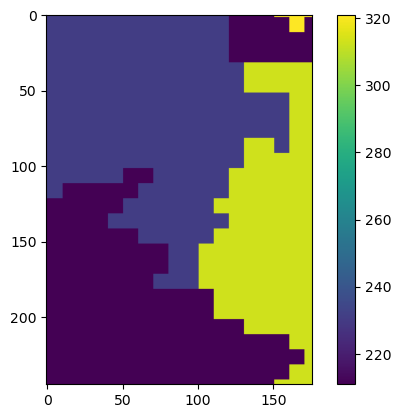

In [61]:
tmp = gu.get_lc_from_coord(df_s2bms_presence.tuple_coords[0])
geemap.ee_export_image(
        tmp, filename='tmp.tif', 
        scale=10,  # 10m bands
        file_per_band=False,# crs='EPSG:32630'
    )
tmp_im = du.load_tiff('tmp.tif')
plt.imshow(tmp_im[0,...])
plt.colorbar

In [ ]:
gu.get_bioclim_lc_from_coords_list(coords_list=df_s2bms_presence.tuple_coords.values,
                                   name_list=df_s2bms_presence.name_loc.values,
                                   save_file=True, save_filename='s2bms_bioclim_lc_data.csv')

In [22]:
df_bioclim_lc = pd.read_csv('../outputs/s2bms_bioclim_lc_data.csv')
corine_keys = [k for k in df_bioclim_lc.iloc[0].index if 'corine_frac_' in k]
df_bioclim_lc.iloc[0][corine_keys].sort_values()[-3:]

corine_frac_313    0.194753
corine_frac_211    0.343214
corine_frac_231    0.462034
Name: 0, dtype: object

In [20]:
du.create_simple_caption(df_bioclim_lc.iloc[0])

'This area consists mainly of pastures (46%), non-irrigated arable land (34%) and mixed forest (19%), with an annual mean temperature of 8.9 °C, a max temperature of warmest month of 20.5 °C, a min temperature of coldest month of 0.1 °C and an annual precipitation of 845.0 mm.'

In [24]:
df_bioclim_lc.bioclim_19

0       252.0
1       267.0
2       262.0
3       254.0
4       123.0
        ...  
1324    173.0
1325    250.0
1326    241.0
1327    242.0
1328    519.0
Name: bioclim_19, Length: 1329, dtype: float64